# Classification Metrics

**Classification models:** can be more complex to evaluate than regression models. There are more trade-offs involved as well as different metrics that can be used.

**Evaluating Classifiers:** We also take a little time to look at how to `plot a confusion matrix` for a logistic regression classifier and introduce a couple of key concepts for `determining the optimal precision-recall trade-off` for a given classifier - `Receiver Operating Characteristic (ROC) curves` and `AUC (the Area Under the Curve)`.

**Class Imbalance Problems:** We look at the ideas of class weights and over/undersampling and how they can be used to work with highly imbalanced classes.

## Confusion Matrix
Table used to describe performance of a classification model ("classifier") on a set of test data for which the true values are known. The matrix compares predicted labels or classifications of the model against the actual labels or classifications; resulting in a matrix of 4 possible outcomes:

**_True Positives (TP)_**: Model predicted positive outcome (e.g. "Yes" or "1") and the true outcome was actually positive.

**_True Negatives (TN)_**: Model predicted positive outcome, but the true outcome was actually negative ( e.g. "No" or "0")

**_False Positives (FP)_**: Model predicted a negative outcome and the true outcome was actually negative.

**_False Negatives (FN)_**: Model predicted a negative outcome but the true outcome was actually positive.

Let's take a look at an example confusion matrix:

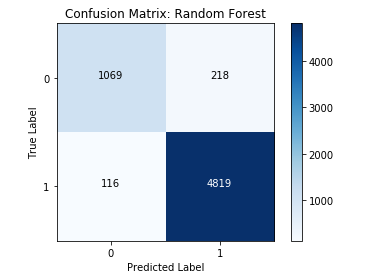

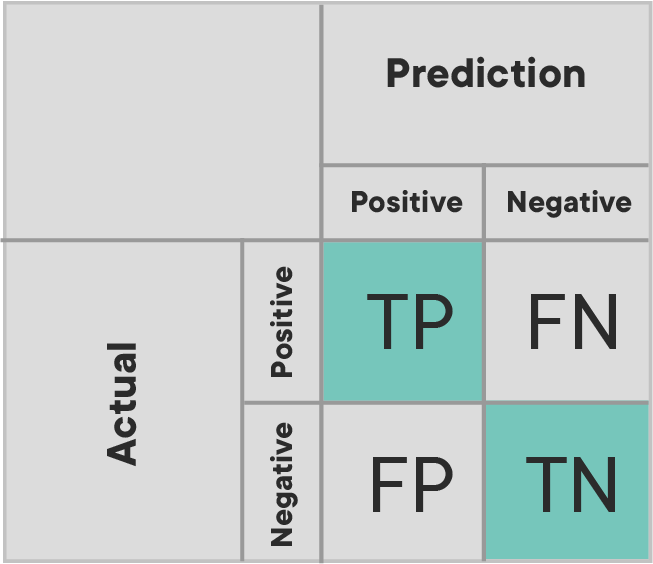

As you can see, one axis of the confusion matrix represents the ground-truth value of the items the model made predictions on, while the other axis represents the labels predicted by the classifier. To read a confusion matrix, look at the intersection of each row and column to tell what each cell represents. For instance, in the example above, the bottom right square represents _True Positives_, because it is the intersection of "True Label: 1" row and the "Predicted Label: 1" column. 

Take another look at the diagram above and see if you can figure out which cells represent TN, FP, and FN.

### Use `sklearn` to create confusion matrices

Since **_confusion matrices_** are a vital part of evaluating supervised learning classification problems, it's only natural that `sklearn` has a quick and easy way to create them. You'll find the `confusion_matrix()` function inside the `sklearn.metrics` module. This function expects two arguments -- the labels, and the predictions, in that order.

In [1]:
from sklearn.metrics import confusion_matrix
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

cf = confusion_matrix(example_labels, example_preds)
cf

array([[2, 3],
       [2, 4]], dtype=int64)

One nice thing about using `sklearn`'s implementation of a confusion matrix is that it automatically adjusts to the number of categories present in the labels. For example:

In [2]:
ex2_labels = [0, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0]
ex2_preds =  [0, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 0]

cf2 = confusion_matrix(ex2_labels, ex2_preds)
cf2

array([[2, 0, 1, 0],
       [0, 2, 1, 1],
       [0, 1, 3, 0],
       [1, 0, 0, 2]], dtype=int64)

Confusion matrices are a very handy tool to help us quickly understand how well a classification model is performing. However, you'll see that the truly useful information comes when you use confusion matrices to calculate **_Evaluation Metrics_** such as *accuracy*, *precision*, and *recall*! 

## Visualizing Confusion Matrices - Lab (Create Our Model)
As usual, we start by fitting a model to data by importing, normalizing, splitting into train and test sets and then calling your chosen algorithm. All you need to do is run the following cell. The code should be familiar to you.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize the data
X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.columns:
    X_train[col] = (X_train[col] - min(X_train[col]))/ (max(X_train[col]) - min(X_train[col]))

for col in X_test.columns:
    X_test[col] = (X_test[col] - min(X_test[col]))/ (max(X_test[col]) - min(X_test[col]))    

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Create the confusion matrix

To gain a better understanding of confusion matrices, complete the `conf_matrix()` function in the cell below.  This function should:

* Take in two arguments: 
    * `y_true`, an array of labels
    * `y_pred`, an array of model predictions
* Return a confusion matrix in the form of a dictionary, where the keys are `'TP', 'TN', 'FP', 'FN'` 

In [4]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 38, 'TN': 26, 'FP': 7, 'FN': 5}

## Check your work with `sklearn`

To check your work, make use of the `confusion_matrix()` function found in `sklearn.metrics` and make sure that `sklearn`'s results match up with your own from above.

- Import the `confusion_matrix()` function
- Use it to create a confusion matrix for `y_test` versus `y_hat_test`, as above 

In [5]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[26  7]
 [ 5 38]]


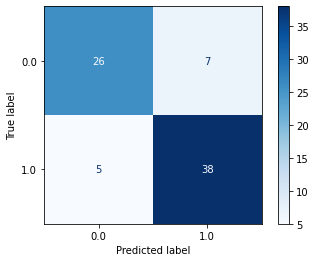

In [6]:
#creatingnice visualization
# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

## Evaluation Metrics Used to Evaluate Performance of Classifiers

### Precision & Recall

 - **_Precision_**: measures how precise the predictions are; Measures the accuracy of the model when it predicts positive cases


 - **_Recall/True Positive Rate/Sensitivity_**: indicates what percentage of the classes we're interested in were actually captured by the model (`Proportion of true positive cases among all actual postive cases`). **Measures ability of a model to correctly identify positive cases; Measures completeness of model when it predicts positive cases**
 

 - **_Specificity/True Negative Rate_**: Measures ability of a model ti correctly identify negative cases. `Proportion of true negative cases among all actual negative cases`
 

 - **_Detection Rate_**: Proportion of all positive cases that were correctly detected by the model. **Measures overall ability of the model to detect positive cases**

`Precision` and `Recall` have an inverse relationship

**A good model should have a good precision as well as a high recall. So ideally one would want to have a measure that combines both these aspects in one single metric - `F1 Score`**

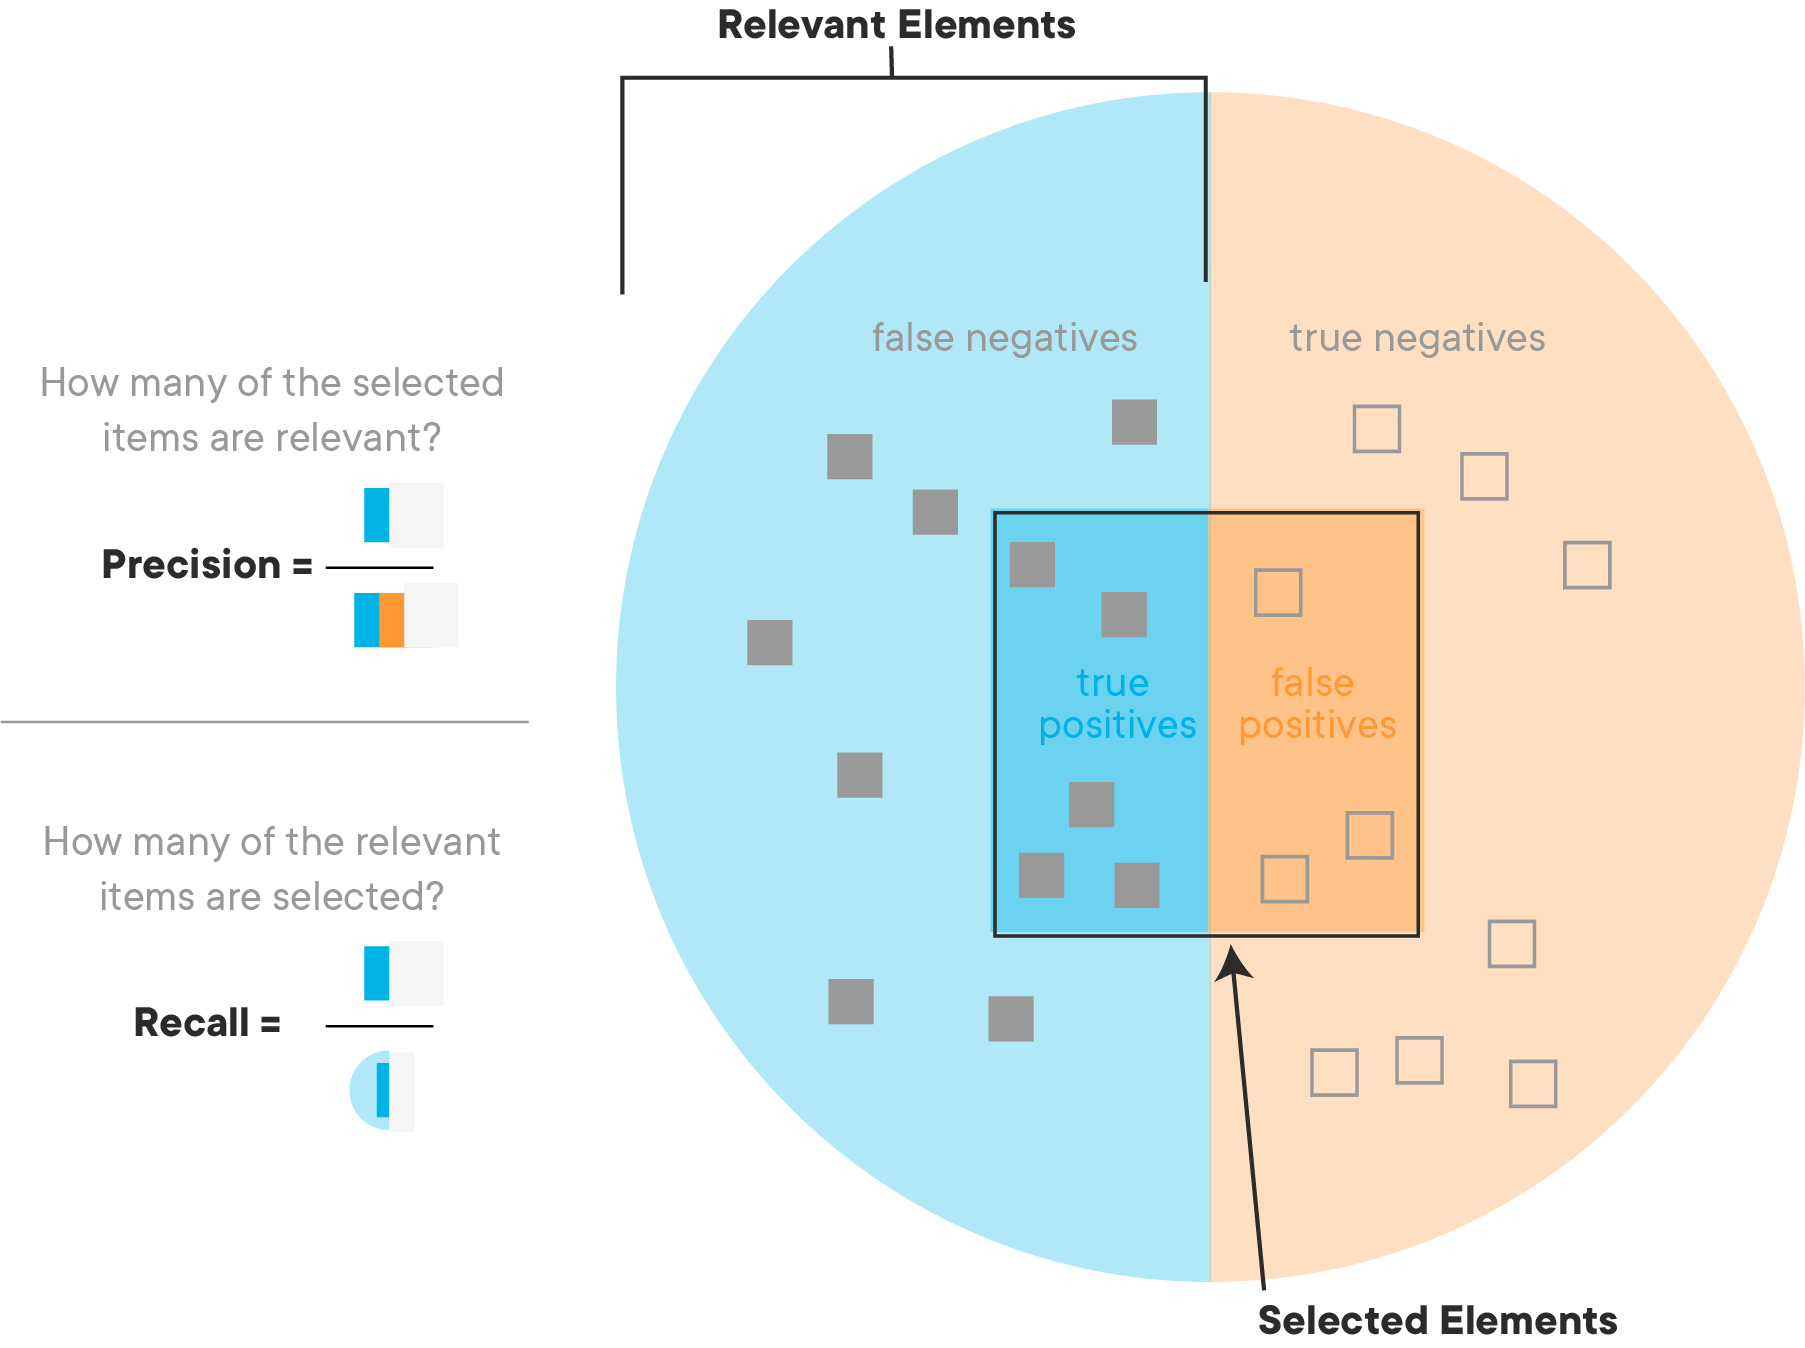

### Accuracy & F1 Score

**_Accuracy_**: allows us to measure the total number of predictions a model gets right, including both **True Positives** and **True Negatives**. Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our model. ***It is useful when classes in dataset are balanced, however when classes are imbalanced accuracy can be misleading coz a classifier that always predicts the majority class will have high accuracy even if it does not perform well on the minority class**

In such cases, precision, recall, F1 Score, ROC-AUC may be more appropriate


**_F1 Score_**: represents the **Harmonic Mean of Precision and Recall**. In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. (Higher the F1 score the better). **F1 score is a useful metric when there is an imbalance between positive and negative cases, as it considers both precision & recall** 

F1 score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1 score is generally the most used metric for describing the performance of a model.

## Which metric to use? (It's common to make tables like the one below, and highlight the best performer for each metric)

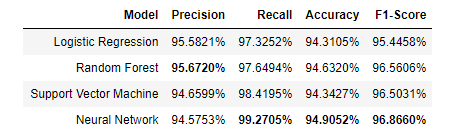

Scikit-learn has a built-in function that will create a **Classification Report**. This classification report even breaks down performance by individual class predictions for your model. You can find the `classification_report()` function in the `sklearn.metrics` module, which takes labels and predictions and returns the precision, recall, F1 score and support (number of occurrences of each label in `y_true`) for the results of a model.


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$

## Evaluation Metrics (Exercise)

In [7]:
#load data & perform train-test split
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df['target']
X = df.drop(columns=['target'], axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
#Base Logistic Regression Model

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [11]:
#Function calculating precision
def precision(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [12]:
#Function calculating recall
def recall(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [13]:
#Function calculating accuracy
def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

In [14]:
#Function calculating F1 score
def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [15]:
#Calculating evalution metrics for both train & test data
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.8449612403100775
Testing Precision:  0.8085106382978723



Training Recall:  0.8934426229508197
Testing Recall:  0.8837209302325582



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8157894736842105



Training F1-Score:  0.8685258964143425
Testing F1-Score:  0.8444444444444444


In [16]:
#calculate metrics using sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8449612403100775
Testing Precision:  0.8085106382978723



Training Recall:  0.8934426229508197
Testing Recall:  0.8837209302325582



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8157894736842105



Training F1-Score:  0.8685258964143425
Testing F1-Score:  0.8444444444444444


In [17]:
#Visualizing metrics
import matplotlib.pyplot as plt
%matplotlib inline

training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision(y_train, y_hat_train))
    testing_precision.append(precision(y_test, y_hat_test))
    training_recall.append(recall(y_train, y_hat_train))
    testing_recall.append(recall(y_test, y_hat_test))
    training_accuracy.append(accuracy(y_train, y_hat_train))
    testing_accuracy.append(accuracy(y_test, y_hat_test))
    training_f1.append(f1(y_train, y_hat_train))
    testing_f1.append(f1(y_test, y_hat_test))
    

Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one.

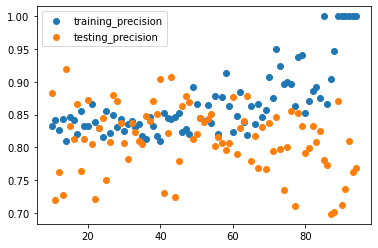

In [18]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

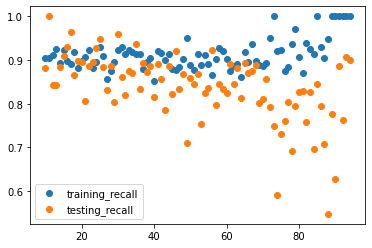

In [19]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

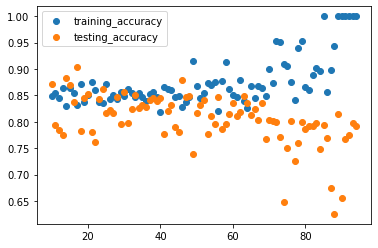

In [20]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

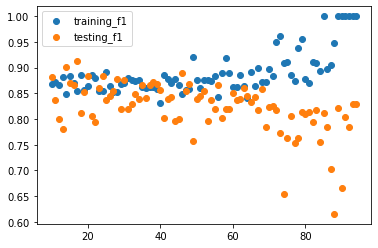

In [21]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()